# Seminar 2: Exploratory Data Analysis in Python

Pandas environment

* We will use the Ames Housing dataset of real estate sales
* The content is based on the Kaggle Competition House Prices Advanced Regression Techniques. See details [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

### Goals for today:
* Read files (csv)
* Display needed parts of df
* Aggregate df
* Filter df

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# If needed, you can install the packages in a following manner

!pip3 install numpy pandas seaborn 

## Task 1: Read data and understand it's structure

### 1a. Load training dataset 

- data in `99_files/house-prices-kaggle.zip`
- load train.csv
- and display 5 random rows

Hint: Use `.style` attribute to display all columns

Hint: See  `data_description.txt` for documentation of variables

In [10]:
import zipfile

In [11]:
# Load the data
path = 'house-prices-advanced-regression-techniques.zip'
with zipfile.ZipFile(path) as z:
    print(z.namelist())

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
with zipfile.ZipFile(path) as z:
    with z.open('train.csv') as f:
        df = pd.read_csv(f)

In [13]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
# To get the informaiton about the dataset, use the method .shape
df.shape

(1460, 81)

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
df.head().style

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,nan,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,nan,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


In [ ]:
with zipfile.ZipFile(path) as z:
    with z.open('data_description.txt') as f:
        desc_data = f.read().decode('utf-8')
        print(desc_data)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### 1b. What is the distribution `SalePrice` variable?

* plot histogram (`.hist()` on `pd.Series`) with bin width $10,000

Hint: Specify bins using range

<Axes: >

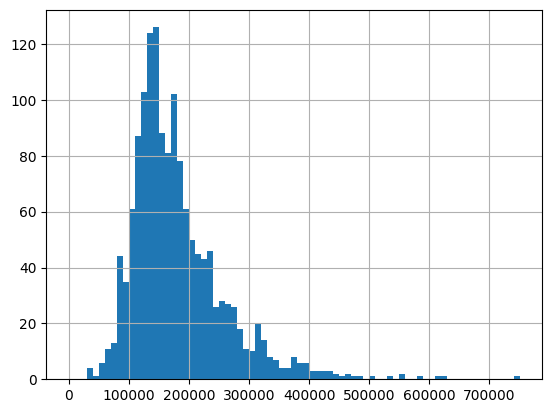

In [26]:
df['SalePrice'].hist(bins=range(0, df['SalePrice'].max(),10000))

<Axes: >

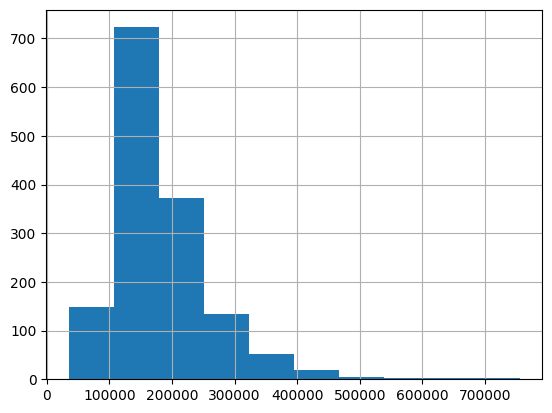

In [14]:
df.SalePrice.hist(bins=10)

<Axes: >

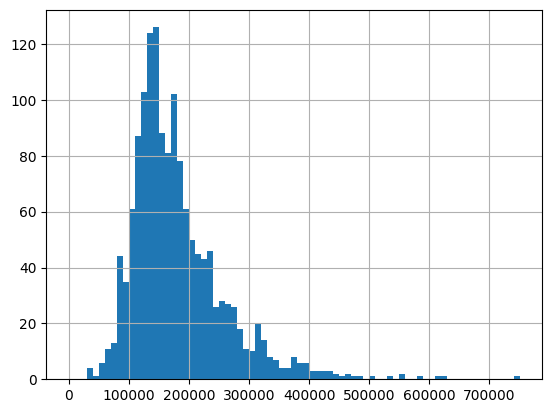

In [15]:
df.SalePrice.hist(bins=range(0, df.SalePrice.max(), 10000))

### 1c. Split columns between quantitative and qualitative variables
Store column names in separate lists of strings `quantitative` and `qualitative`

Hint: `.dtypes` attribute contains a series with strings describing dtype of the data

In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
quantitative_columns = [column for column in df.columns if df.dtypes[column] != 'object']
qualitative_columns = [column for column in df.columns if df.dtypes[column] == 'object']
qualitative_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
df[qualitative_columns]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
quantitative = [column for column in df.columns if df.dtypes[column] != 'object']
qualitative = [column for column in df.columns if df.dtypes[column] == 'object']

print(f'Quantitative variables: {quantitative} \n')
print(f'Qualitative variables: {qualitative}')

Quantitative variables: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

Qualitative variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', '

### 1c* display df with only quantitative columns

In [20]:
df[quantitative]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


### 1d. Are `dtype`s correct? 

* visually check whether all the columns look correctly parsed

In [49]:
df['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [46]:
df[qualitative_columns].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
237,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,RRNe,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
187,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,Detchd,Unf,Fa,Fa,N,NaN,MnPrv,NaN,WD,Normal
557,C (all),Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,COD,Normal
1197,RM,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,ConLw,Normal
460,FV,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial


In [40]:
df[quantitative][:10].style

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.000000,8450,7,5,2003,2003,196.000000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.000000,9600,6,8,1976,1976,0.000000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.000000,11250,7,5,2001,2002,162.000000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000000,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.000000,9550,7,5,1915,1970,0.000000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000000,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.000000,14260,8,5,2000,2000,350.000000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000000,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.000000,14115,5,5,1993,1995,0.000000,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.000000,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.000000,10084,8,5,2004,2005,186.000000,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.000000,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,nan,10382,7,6,1973,1973,240.000000,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.000000,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.000000,6120,7,5,1931,1950,0.000000,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.000000,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.000000,7420,5,6,1939,1950,0.000000,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.000000,1,205,0,4,0,0,0,0,0,1,2008,118000


In [55]:
df.shape

(1460, 81)

### 1e. Plot number of missing data for all columns

In [59]:
df.isna().sum().sort_values(ascending=False).plot.bar(figsize=(15, 5)))

SyntaxError: unmatched ')' (2486751123.py, line 1)

<Axes: >

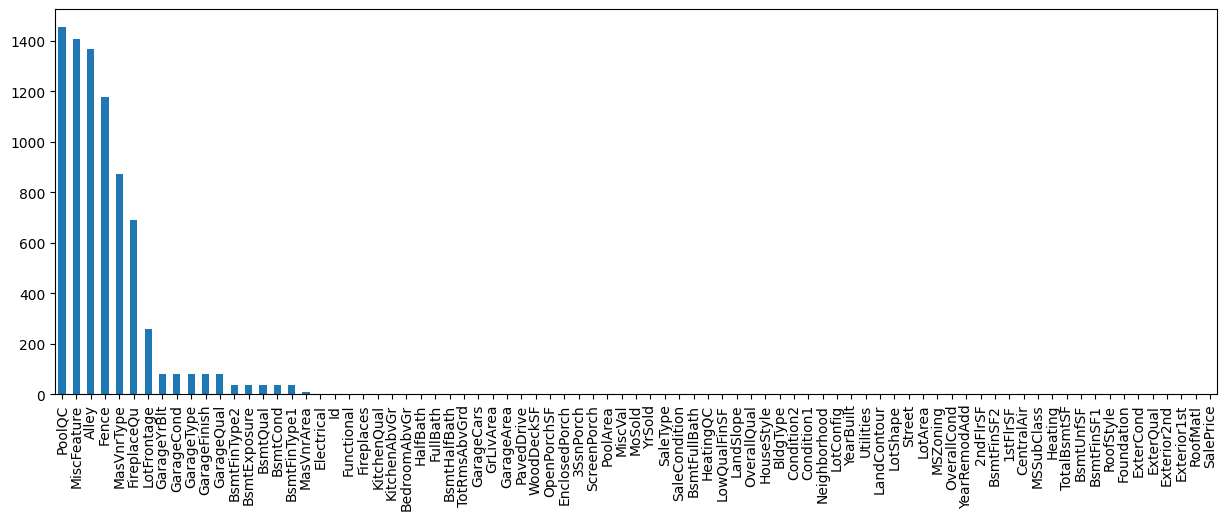

In [42]:
df.isna().sum().sort_values(ascending=False).plot.bar(figsize=(15, 5))

### For the better visiability drop columns with no missing data

In [86]:
df.columns[df.isna().any()].to_list()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [88]:
df.columns[df.isna().any()].to_list()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [89]:
col_names_with_missing_values = df.columns[df.isna().any()].tolist()
col_names_with_missing_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<Axes: >

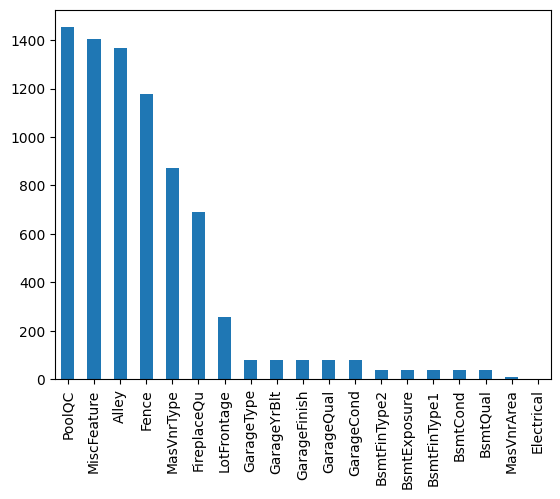

In [92]:
df[col_names_with_missing_values].isna().sum().sort_values(ascending=False).plot.bar()

<Axes: >

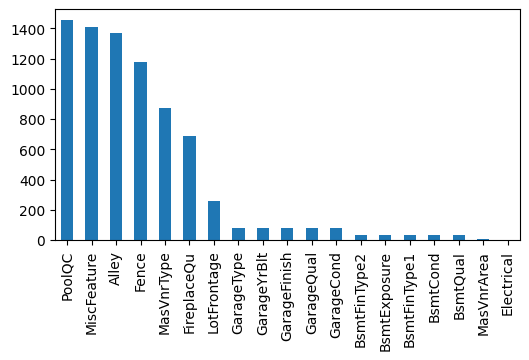

In [45]:
df[col_names_with_missing_values].isna().sum().sort_values(ascending=False).plot.bar(figsize=(6, 3))

## Task 2: Aggregation

### 2.1 Calculate the average LotArea for each year (YrSold)

In [111]:
df.groupby('YrSold')

In [106]:
df.groupby('YrSold')[['LotArea', 'SalePrice']].mean()

,LotArea,SalePrice
YrSold,,
2006,10489.458599,182549.458599
2007,10863.686930,186063.151976
2008,10587.687500,177360.838816
2009,10294.248521,179432.103550
2010,10220.645714,177393.674286


In [50]:
df.groupby('YrSold')[['LotArea']].mean()

,LotArea
YrSold,
2006,10489.458599
2007,10863.686930
2008,10587.687500
2009,10294.248521
2010,10220.645714


In [21]:
df[['YrSold', 'LotArea']].groupby('YrSold').agg(["mean", "min", "max"]).reset_index()

YrSold       LotArea              
                  mean   min     max
0   2006  10489.458599  1533   70761
1   2007  10863.686930  1890  159000
2   2008  10587.687500  1680  164660
3   2009  10294.248521  1300  215245
4   2010  10220.645714  1491   57200

In [22]:
df.groupby('YrSold').agg({"LotArea": ["mean", "min", "max"]})

LotArea              
                mean   min     max
YrSold                            
2006    10489.458599  1533   70761
2007    10863.686930  1890  159000
2008    10587.687500  1680  164660
2009    10294.248521  1300  215245
2010    10220.645714  1491   57200

### 2.2 Calculate the average SalePrice for each street (Street)

In [114]:
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [118]:
df.groupby('Street')[['SalePrice']].mean()

,SalePrice
Street,
Grvl,130190.500000
Pave,181130.538514


In [116]:
df.groupby('Street').agg({"SalePrice": ["mean"]}).reset_index()

,Street,SalePrice
,,mean
0,Grvl,130190.500000
1,Pave,181130.538514


### 2.2 Calculate the average SalePrice for Grvl street (Street)

In [135]:
df[df['Street']=='Grvl'].groupby('Street').agg({'SalePrice': ['mean']})

,SalePrice
,mean
Street,
Grvl,130190.5


In [128]:
df[df['Street']=='Grvl']['SalePrice'].mean()

130190.5

In [132]:
df[df['Street']=='Pave'].groupby('YrSold')[['SalePrice']].mean()

,SalePrice
YrSold,
2006,182549.458599
2007,186267.819572
2008,177509.089404
2009,179432.103550
2010,178484.971098


### 2.3 Calculate the average SalePrice for Grvl street (Street) But! Take into account only flats which cost more than 100000

In [ ]:
df[(df['Street']=='Grvl')
   & (df['SalePrice'] < 100000)]['SalePrice'].mean()

68496.5

In [142]:
df_filtered = df[df['SalePrice'] < 100000]
df_filtered.groupby('Street').agg({"SalePrice": ["mean"]}).reset_index()

,Street,SalePrice
,,mean
0,Grvl,68496.500000
1,Pave,81373.794643


## Task 3 Filtering

### 3.1 How many flats cost less than 200000 and have a 'Normal' condition (column SaleCondition)

In [148]:
variable = 4
print(f'ABSSADASD {variable}')

ABSSADASD 4


In [153]:
df[(df["SalePrice"] < 200000) & (df["SaleCondition"]=="Normal")].shape[0]

872

In [147]:
print(f'The number of flats satisfying the condition is {df[(df["SalePrice"] < 200000) & (df["SaleCondition"]=="Normal")].shape[0]}')

The number of flats satisfying the condition is 872


In [57]:
df[(df['SalePrice'] < 200000) & (df['SaleCondition'] == 'Normal')].shape[0]

872

In [58]:
len(df[(df['SalePrice'] < 200000) & (df['SaleCondition'] == 'Normal')])

872

### 3.2 How many flats cost less than 200000 or have a 'Normal' condition (column SaleCondition)

In [59]:
df[(df['SalePrice'] < 200000) | (df['SaleCondition'] == 'Normal')].shape[0]

1351

### 3.3 How many flats cost have more areas on the second floor(2ndFlrSF) then on the first one(1stFlrSF)?

In [60]:
df[df['1stFlrSF'] < df['2ndFlrSF']].shape[0]

135

### What is the average cost (in thousands) for such type of the flats?

In [32]:
xk = round(df[df['1stFlrSF'] < df['2ndFlrSF']]['SalePrice'].mean()/10**3, 2)
print(f"Average sale price for houses with 1stFlrSF < 2ndFlrSF: {xk}k")

Average sale price for houses with 1stFlrSF < 2ndFlrSF: 200.49k


# BONUSES

## Task 1: Study relationships between variables

### 1a. see correlation matrix

<Axes: >

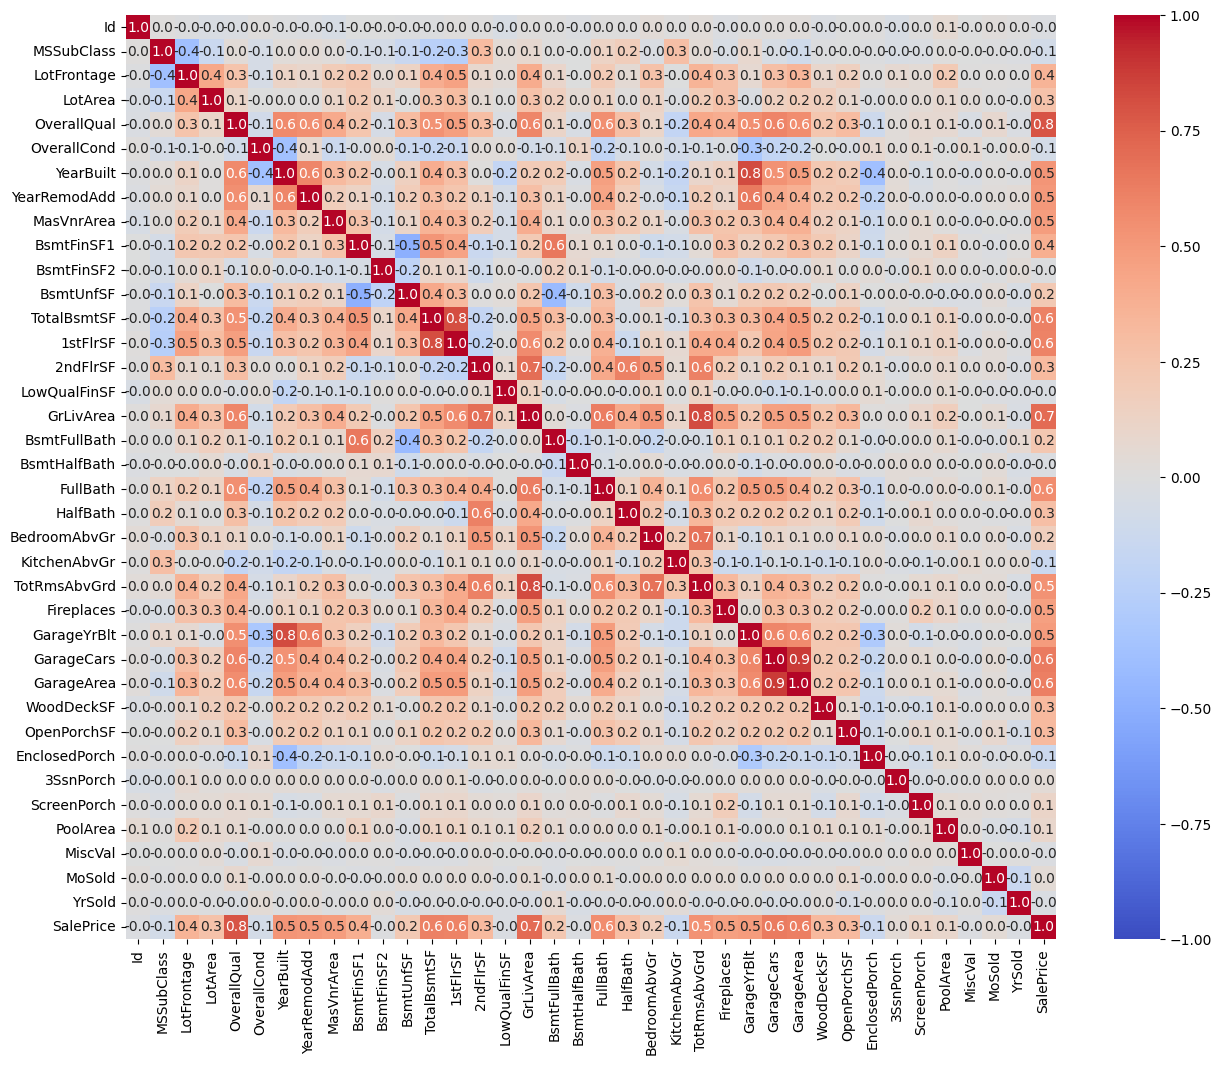

In [33]:
fig = plt.subplots(1, 1, figsize=(15, 12))
# correlation matrix
df_corr = df[quantitative].corr()
sns.heatmap(df_corr, vmin=-1, cmap="coolwarm", annot=True, fmt="0.1f") 
# annot=True to print values inside the square
# fmt="0.1f" to print one decimal place
# vmin=-1 to set the minimum value of the color scale to -1

### 2b. Boxplots for numerical variables

In [67]:
df[qualitative].head().columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

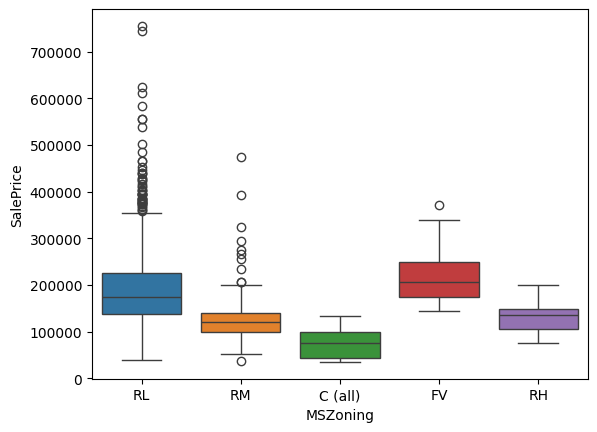

In [63]:
# pick one categorical column and one quantitative column
sns.boxplot(data=df, x="MSZoning", y="SalePrice", hue='MSZoning') # 